In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sp

In [2]:
df = pd.read_csv('FleetAll.csv')
df=df.drop(columns=['Vehicle Category','GVWR Class','MPO'])
df = df.where(df['Model Year'] != 'Unknown').dropna()

In [3]:
years = np.arange(2018,2036)
years_missing=[2018, 2019, 2020, 2021, 2022, 2026, 2027, 2028,
       2029, 2030, 2031, 2032, 2033, 2034, 2035]
sales_percentage_missing = [7.6,7.6,8.1,12.8,17.9,35,43,51,59,68,76,82,88,94,100]
f= sp.interp1d(years_missing,sales_percentage_missing)
sales_percentage = []
for i in years:
    sales_percentage.append(f(i))


In [4]:
times = df.drop(columns=['Fuel Type'])
times = times.where(times['Model Year'] != 'Unknown').dropna()
times['Model Year'] = times['Model Year'].astype(int)
times = times.groupby(['Model Year']).sum()

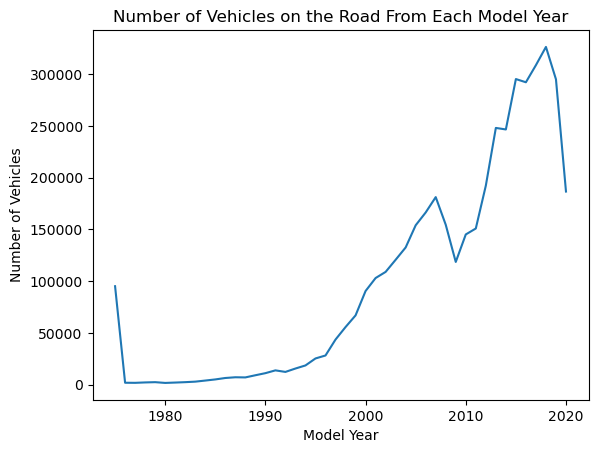

In [5]:
shortened = times.drop(2021, axis = 0)
plt.plot(shortened)
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Number of Vehicles on the Road From Each Model Year')
plt.show()

In [6]:
f2 = sp.CubicSpline([1980,1990,2002,2015,2018],np.log([1801,11219.0,108976.0-8000,295129.0-10050,326147.0-20000]), extrapolate=True)

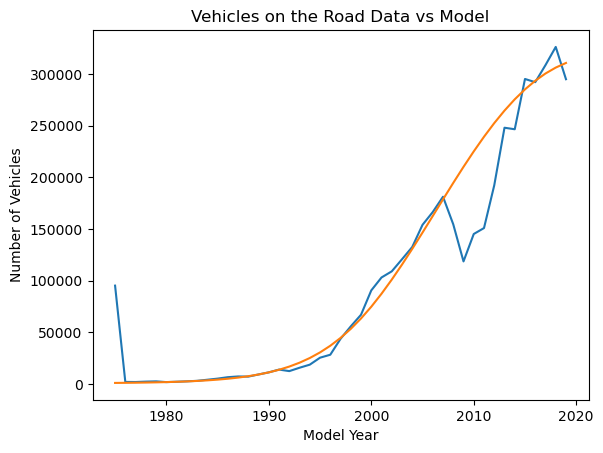

In [7]:
plt.figure()
plt.plot(np.arange(1975,2020),times['Vehicle Population'][np.arange(1975,2020)])
plt.plot(np.arange(1975,2020),np.exp(f2(np.arange(1975,2020))))
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Vehicles on the Road Data vs Model')
plt.show()

In [8]:
def model(year):
    return 0.98323* np.exp(f2(year))

In [9]:
pops = np.array(times['Vehicle Population'])
weighted_avg_tot = 0
for i in range(47):
    weighted_avg_tot += pops[i]*(1975+i)

weighted_avg = weighted_avg_tot/sum(pops)
weighted_avg

2009.83158810058

In [10]:
weighted_model_tot = 0
for i in range(1960,2020):
    weighted_model_tot += model(i)*(i)

weighted_model = weighted_model_tot/sum(pops)
weighted_model

2009.8276601936905

In [11]:
evf = df.where(df['Fuel Type'] == 'Electric').dropna()
evf = evf.where(evf['Model Year'] != 'Unknown').dropna()
evf = evf.drop('Fuel Type', axis = 1)
evf = evf.groupby(['Model Year']).sum()

icef = df.where(df['Fuel Type'] == 'Gasoline').dropna()
icef = icef.where(icef['Model Year'] != 'Unknown').dropna()
icef = icef.drop('Fuel Type', axis = 1)
icef = icef.groupby(['Model Year']).sum()


icef = icef.rename(columns={"Vehicle Population": "ICE Population"})
evf = evf.rename(columns={"Vehicle Population": "EV Population"})
dfn = icef.merge(evf, how = 'outer',on='Model Year')
dfn = dfn.fillna(0)

In [12]:
total_years = np.array(range(1975,2036))
EV_percent = np.array(dfn["EV Population"]/(dfn["EV Population"]+dfn["ICE Population"]))
EV_percent = np.append(EV_percent,sales_percentage[4:])
percents = pd.DataFrame(data = {'total_years': total_years, 'EV_percent': EV_percent})

In [15]:
percents

,total_years,EV_percent
0,1975,0.000084
1,1976,0.000516
2,1977,0.000546
3,1978,0.000000
4,1979,0.000000
...,...,...
56,2031,76.000000
57,2032,82.000000
58,2033,88.000000
59,2034,94.000000


In [13]:
pred_pop = []
pred_EV = []
for i in range(1960,2020):
    pred_pop.append(model(i))
    pred_EV.append(model(i)*(percents.iloc[i-1960,1])/100)
sum(pred_EV)

1882584.8713741102

In [14]:
total_percent_ev = sum(pred_EV)/sum(pred_pop)
total_percent_ev

0.4217366135393132

In [ ]:
def percent_at_year()
    pred_pop = []
    pred_EV = []
    for i in range(1960,2020):
        pred_pop.append(model(i))
        pred_EV.append(model(i)*(percents.iloc[i-1960,1])/100)
    total_percent_ev = sum(pred_EV)/sum(pred_pop)
    return total_percent_ev

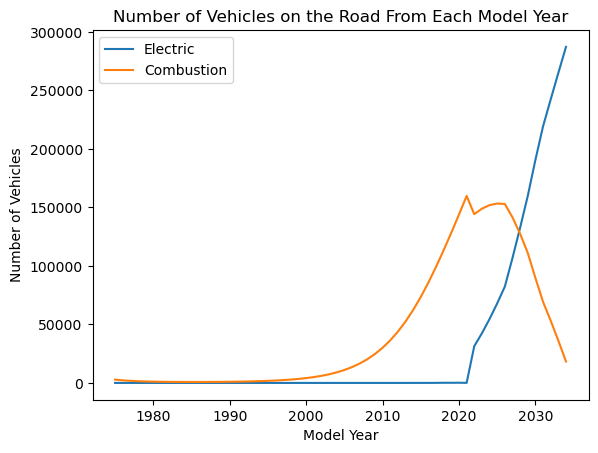

In [14]:
plt.figure()
plt.plot(np.arange(1975,2035),pred_EV)
#plt.plot(np.arange(1975,2035),pred_pop)
plt.plot(np.arange(1975,2035),np.subtract(pred_pop,pred_EV))
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Number of Vehicles on the Road From Each Model Year')
plt.legend(['Electric', 'Combustion'])
plt.show()